In [1]:
import cv2

In [2]:
import os,glob
from PIL import Image

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet50 import decode_prediction

ImportError: cannot import name 'decode_prediction' from 'tensorflow.keras.applications.resnet50' (C:\Users\Ritvik Sharma\AppData\Roaming\Python\Python310\site-packages\keras\_tf_keras\keras\applications\resnet50\__init__.py)

In [8]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [9]:
model = ResNet50(weights='imagenet')

In [10]:
def load_and_preprocess_image(img_path):
    img=image.load_img(img_path, target_size=(224, 224))  
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x=preprocess_input(x)
    return x

In [11]:
img_path="E:Gastro Intestine/kvasir-dataset/kvasir-dataset/poly/0e68fc5b-beaa-4607-a13a-f6db84121c78.jpg"

In [12]:
img=cv2.imread(img_path)
img = cv2.resize(img,(224,224))
img = img.reshape(1,224,224,3)

In [13]:
img=image.load_img(img_path,target_size=(224,224))
x=load_and_preprocess_image(img_path)

In [14]:
x= np.array(img)
x

array([[[6, 6, 4],
        [5, 5, 3],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 4],
        [6, 6, 4]],

       [[6, 6, 6],
        [7, 7, 5],
        [6, 6, 6],
        ...,
        [5, 5, 5],
        [5, 5, 3],
        [5, 5, 5]],

       [[5, 5, 3],
        [6, 6, 4],
        [6, 6, 6],
        ...,
        [5, 5, 3],
        [5, 5, 5],
        [4, 4, 4]],

       ...,

       [[1, 3, 2],
        [1, 3, 2],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [2, 2, 0],
        ...,
        [2, 2, 0],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 0],
        [2, 2, 2],
        [3, 3, 1],
        ...,
        [3, 3, 1],
        [2, 2, 0],
        [2, 2, 0]]], dtype=uint8)

In [15]:
x=image.img_to_array(img)
x

array([[[6., 6., 4.],
        [5., 5., 3.],
        [6., 6., 6.],
        ...,
        [6., 6., 6.],
        [6., 6., 4.],
        [6., 6., 4.]],

       [[6., 6., 6.],
        [7., 7., 5.],
        [6., 6., 6.],
        ...,
        [5., 5., 5.],
        [5., 5., 3.],
        [5., 5., 5.]],

       [[5., 5., 3.],
        [6., 6., 4.],
        [6., 6., 6.],
        ...,
        [5., 5., 3.],
        [5., 5., 5.],
        [4., 4., 4.]],

       ...,

       [[1., 3., 2.],
        [1., 3., 2.],
        [3., 3., 3.],
        ...,
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 0.],
        ...,
        [2., 2., 0.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[2., 2., 0.],
        [2., 2., 2.],
        [3., 3., 1.],
        ...,
        [3., 3., 1.],
        [2., 2., 0.],
        [2., 2., 0.]]], dtype=float32)

In [16]:
x.shape

(224, 224, 3)

In [17]:
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
x

array([[[[ -99.939, -110.779, -117.68 ],
         [-100.939, -111.779, -118.68 ],
         [ -97.939, -110.779, -117.68 ],
         ...,
         [ -97.939, -110.779, -117.68 ],
         [ -99.939, -110.779, -117.68 ],
         [ -99.939, -110.779, -117.68 ]],

        [[ -97.939, -110.779, -117.68 ],
         [ -98.939, -109.779, -116.68 ],
         [ -97.939, -110.779, -117.68 ],
         ...,
         [ -98.939, -111.779, -118.68 ],
         [-100.939, -111.779, -118.68 ],
         [ -98.939, -111.779, -118.68 ]],

        [[-100.939, -111.779, -118.68 ],
         [ -99.939, -110.779, -117.68 ],
         [ -97.939, -110.779, -117.68 ],
         ...,
         [-100.939, -111.779, -118.68 ],
         [ -98.939, -111.779, -118.68 ],
         [ -99.939, -112.779, -119.68 ]],

        ...,

        [[-101.939, -113.779, -122.68 ],
         [-101.939, -113.779, -122.68 ],
         [-100.939, -113.779, -120.68 ],
         ...,
         [-100.939, -113.779, -120.68 ],
         [-100.939, -1

In [18]:
s=load_resize_preprocess_image(img_path)

NameError: name 'load_resize_preprocess_image' is not defined

In [19]:
import tensorflow as tf

img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
img = tf.image.resize(img_tensor, [224, 224])
img_batch = tf.expand_dims(img, axis=0)

In [20]:
predictions=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


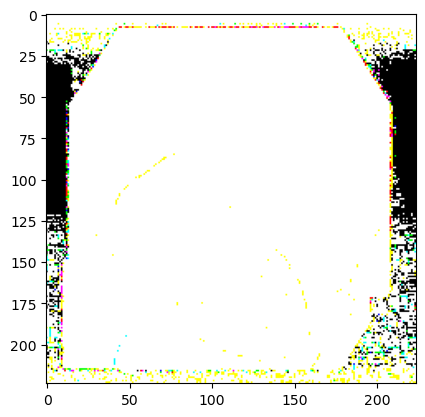

In [21]:
plt.imshow(img)

In [22]:
file_path="E:/Gastro Intestine/kvasir-dataset/kvasir-dataset"

In [23]:
name_class=os.listdir(file_path)
name_class

['eso', 'norm', 'poly', 'ulcer']

In [24]:
file_paths=list(glob.glob(file_path + '/**/*.*' ))

In [25]:
file_paths

['E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\001fb927-4814-4ba5-851d-189db99291d8.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\00687a70-bbad-4bf9-864f-9f7b3c27a2c8.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\0134d93d-0922-4063-9acd-a4177f2b0c07.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\01a57b1a-780f-4e52-9f94-291c2982154d.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\01f092a2-fccb-49f6-af06-8351c8bb47f1.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\022b40a7-a36f-4510-95a1-b6bb709e94ed.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\02b1d319-dea6-418b-969a-c588585cb4f2.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\02de4b4c-8704-45f7-b90f-6004d76bdded.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\0339a2f7-65bb-41fb-8650-e119670b4e2e.jpg',
 'E:/Gastro Intestine/kvasir-dataset/kvasir-dataset\\eso\\03ccdf30-eac8-4e3b-b8e5-54fbf6470

In [26]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],file_paths))
labels

['eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',
 'eso',


In [27]:
filepath=pd.Series(file_paths,name="Filepath").astype(str)
labels=pd.Series(labels,name="Labels")
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Filepath,Labels
0,E:/Gastro Intestine/kvasir-dataset/kvasir-data...,poly
1,E:/Gastro Intestine/kvasir-dataset/kvasir-data...,ulcer
2,E:/Gastro Intestine/kvasir-dataset/kvasir-data...,ulcer
3,E:/Gastro Intestine/kvasir-dataset/kvasir-data...,poly
4,E:/Gastro Intestine/kvasir-dataset/kvasir-data...,ulcer


Text(0.5, 0, 'Type')

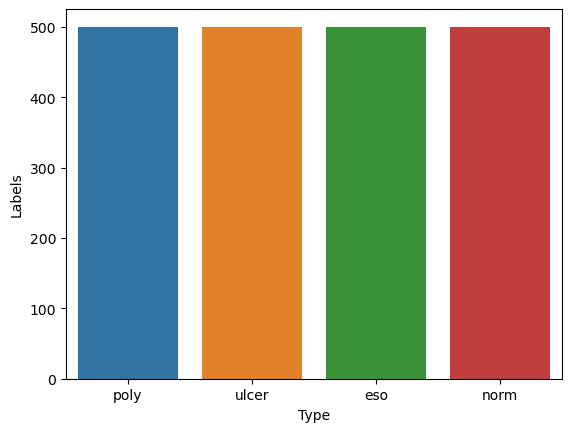

In [28]:
count=data.Labels.value_counts()
sns.barplot(x=count.index,y=count)
plt.xlabel('Type')

In [29]:
train,test=train_test_split(data,test_size=0.25,random_state=50)

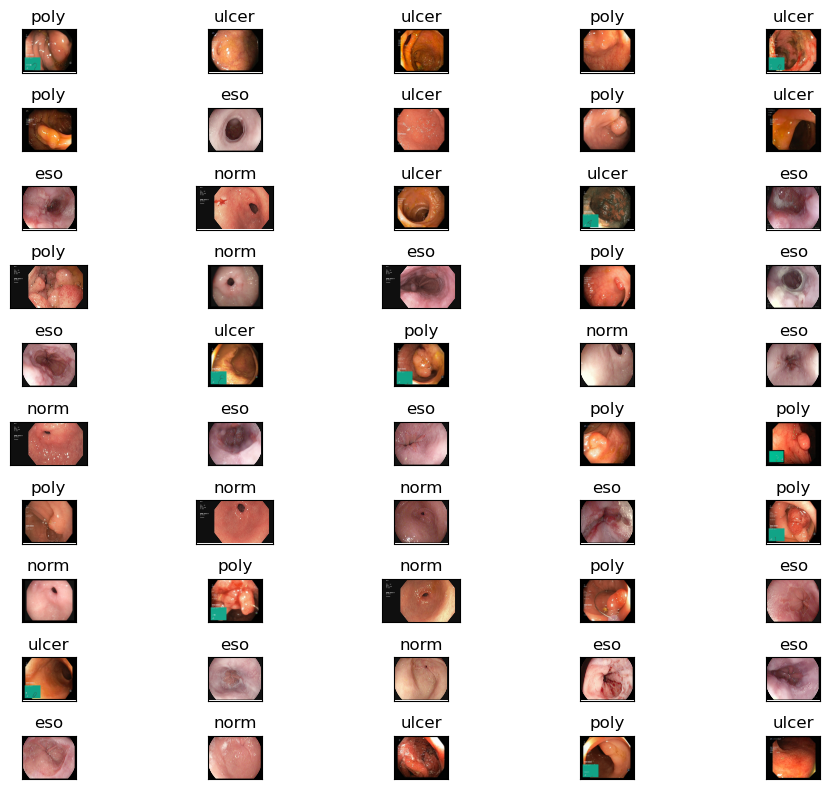

In [30]:
fig,axes=plt.subplots(nrows=10,ncols=5,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()

In [31]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [32]:
train_gen=train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Labels',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle =True,
    seed=42
)
valid_gen=train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Labels',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen=test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Labels',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1500 validated image filenames belonging to 4 classes.
Found 500 validated image filenames belonging to 4 classes.
Found 500 validated image filenames belonging to 4 classes.


In [33]:
pretrained_model=ResNet50(
input_shape=(224,224,3),
include_top=False,
weights='imagenet',
pooling='avg'
)
pretrained_model.trainable=False

In [34]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='softmax')(x)
model=Model(inputs=inputs,outputs=outputs)

In [35]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [36]:
my_callbacks=[EarlyStopping(monitor='val_accuracy',
             min_delta=0,
             patience=2,
             mode='auto')]

In [37]:
num_classes = 4

In [38]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [39]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [40]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [41]:
from tensorflow.keras.applications.resnet50 import decode_predictions
predictions = model.predict(x)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [42]:
if predictions is not None:
    if predictions.shape[0] == 0:
        print("Error: No predictions.")
    else:
        decoded_predictions = decode_predictions(predictions, top=3)[0]
        print('Predicted:', decoded_predictions)

Predicted: [('n04111531', 'rotisserie', 0.34025443), ('n01945685', 'slug', 0.2565445), ('n02395406', 'hog', 0.11275075)]


In [43]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10


C:\Users\Ritvik Sharma\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 394s 8s/step - accuracy: 0.7521 - loss: 0.9313 - val_accuracy: 0.2640 - val_loss: 132139744.0000
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 293s 6s/step - accuracy: 0.8144 - loss: 0.8214 - val_accuracy: 0.2640 - val_loss: 25238.1172
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.8700 - loss: 0.5008 - val_accuracy: 0.2180 - val_loss: 52679.7305
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.8691 - loss: 0.5023 - val_accuracy: 0.2740 - val_loss: 38.1684
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.9127 - loss: 0.2261 - val_accuracy: 0.7960 - val_loss: 0.5844
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 278s 6s/step - accuracy: 0.9179 - loss: 0.2025 - val_accuracy: 0.8660 - val_loss: 0.4768
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 278s 6s/step - accuracy: 0.9240 - loss: 0.1818 - val_accuracy: 0.8260 - val_loss: 0.9305
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 277s 6s/step - accuracy: 0.9493 - loss: 0.1396 - val_accuracy: 0.91

In [44]:
model.save('ResNet50.h5')

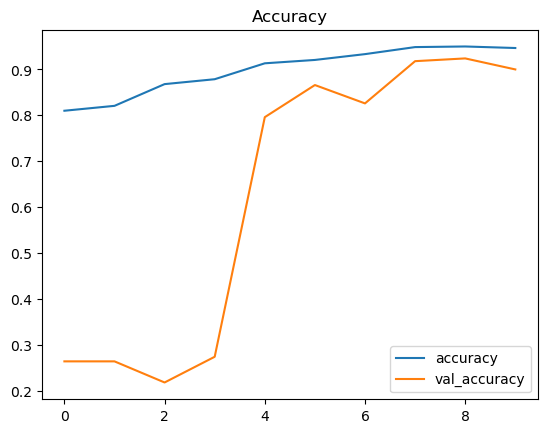

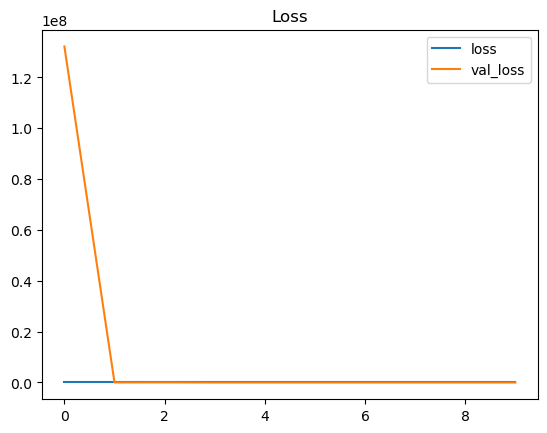

In [46]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [47]:
results=model.evaluate(test_gen,verbose=0)
print("Test Loss: {:5f}".format(results[0]))
print("Test Accuracy: {:2f}%".format(results[1]*100))

C:\Users\Ritvik Sharma\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 0.284357
Test Accuracy: 89.999998%


In [48]:
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [49]:
y_test=list(test.Labels)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         eso       0.99      0.93      0.96       132
        norm       0.89      0.98      0.93       122
        poly       0.94      0.74      0.83       137
       ulcer       0.79      0.96      0.87       109

    accuracy                           0.90       500
   macro avg       0.90      0.91      0.90       500
weighted avg       0.91      0.90      0.90       500



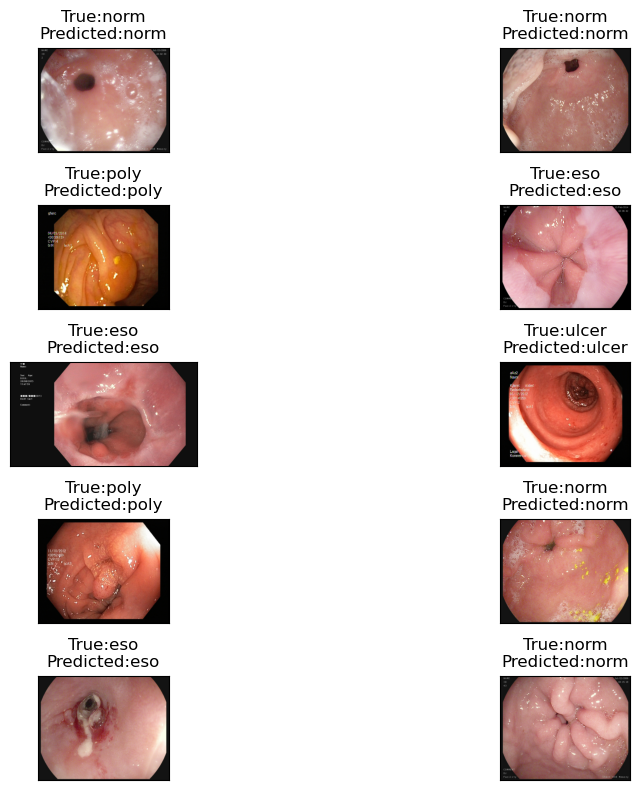

In [50]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Labels.iloc[i]}\nPredicted:{pred[i]}")
plt.tight_layout()
plt.show()